### **Understanding and preparing data for causal analysis in machine learning**

**Understanding Causal Inference**

* Distinction from Correlation: Causal inference goes beyond correlation. While correlation indicates a relationship between variables, causation explores how one variable directly affects another.
* Counterfactual Thinking: A core component of causal inference is considering counterfactuals – asking "what if" questions to understand what would happen to one variable if you change another.
* Causal Models: Frameworks like Rubin's Causal Model or Pearl's Causal Framework use graphical models and structural equations to formalize and test causal hypotheses.



**Data Preparation for Causal Analysis:**

* **Identifying Relevant Variables:**
   * **Domain Knowledge:** Leverage domain expertise to identify potential causal relationships. Understanding the domain helps in hypothesizing which variables could plausibly have a cause-and-effect relationship.
   * **Exploratory Data Analysis (EDA):** Use statistical methods and data visualization tools to explore relationships in the data and guide the identification of relevant variables.
* **Handling Missing Data:**
   * **Missing Data Mechanisms:** Understand the mechanism leading to missing data – is it Missing Completely at Random (MCAR), Missing at Random (MAR), or Missing Not at Random (MNAR)?
   * **Imputation Techniques:** Depending on the mechanism, apply imputation techniques like mean/mode imputation, regression imputation, or more advanced methods like multiple imputation or K-nearest neighbors.
* **Dealing with Confounders:**
   * **Identification:** Use statistical methods and domain knowledge to identify potential confounders – variables that could influence both the cause and the effect.
   * **Adjustment Strategies:** Apply methods like stratification, regression control, propensity score matching, or instrumental variable analysis to adjust for the confounding effects.
   * **Sensitivity Analysis:** Conduct sensitivity analysis to evaluate how robust the causal inferences are to the presence of unmeasured confounding.

**Advanced Techniques in Causal Inference:**

* **Instrumental Variables (IV):** Use variables that affect the treatment but not the outcome directly, providing a way to assess causal effects in the presence of confounding.
* **Propensity Score Methods:** Estimate the probability of treatment assignment conditional on observed covariates to balance the treatment and control groups.
* **Graphical Causal Models:** Use Directed Acyclic Graphs (DAGs) to represent causal relationships and help identify confounders and test causal assumptions.
* **Machine Learning in Causality:** Utilize machine learning models to estimate causal effects, particularly with large, complex datasets. Techniques like causal forest or deep learning-based causal inference are emerging in this space.

**Code Implementation**

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

**Data Loading and Preliminary Analysis:**

The dataset was loaded into a DataFrame. Initial exploratory data analysis (EDA) was conducted to understand the structure, features, and distributions of the data.

In [9]:
pip install ucimlrepo

In [10]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

df = pd.concat([X, y], axis=1)


The Adult dataset, often referred to as the "Census Income" dataset, is a popular dataset for machine learning, particularly for tasks involving classification and prediction. It can be found in the UCI Machine Learning Repository, and here's an overview:

**Description:**
The Adult dataset was extracted from the 1994 Census database and is used to predict whether an individual earns over $50K a year based on census data. It's a classic dataset for binary classification tasks.

**Features:**
The dataset includes the following features:

* age: The age of the individual.
* workclass: The employment category of the individual (e.g., Private, Self-emp-not-inc, State-gov).
* fnlwgt: Final weight. This is the number of people the census believes the entry represents.
* education: The highest level of education achieved by the individual (e.g., Bachelors, HS-grad).
* education-num: The highest level of education in numerical form.
marital-status: Marital status of the individual.
* occupation: The individual’s occupation (e.g., Tech-support, Craft-repair).
relationship: Includes spouse, parent, child, etc.
* race: Race of the individual.
* sex: The sex of the individual.
* capital-gain: Continuous income from capital gains.
* capital-loss: Continuous losses from capital losses.
* hours-per-week: Number of hours worked per week.
* native-country: Country of origin for the individual.
* Target Variable:
The target variable is income, which is a binary variable typically coded as “<=50K” and “>50K”, representing whether the person earns less than or equal to 50,000 dollars a year or more than 50,000 dollars a year, respectively.

In [11]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**Feature Selection for Causal Analysis:**

Based on the causal question of interest, relevant features were identified and selected. This included choosing the treatment variable (e.g., a variable representing an intervention or condition) and the outcome variable (e.g., income), along with potential confounders (variables that could influence both the treatment and the outcome).

In [12]:
# Assume our causal question is the effect of education on income
treatment = 'education-num'  # or 'education' if you want to use the categorical variable
outcome = 'income'

In [16]:
confounders = [
    'age', 'workclass', 'fnlwgt', 'marital-status',  # Corrected hyphen instead of underscore
    'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week',  # Corrected hyphens instead of underscores
    'native-country'  # Corrected hyphen instead of underscore
]

In [17]:
# Now you can construct a dataset that only includes these features for analysis
features_for_analysis = [treatment] + confounders + [outcome]
df_causal = df[features_for_analysis]

**Encoding Categorical Variables:**

Categorical variables in the dataset were encoded into a numeric format suitable for modeling. This step involved converting text categories into numbers or binary flags.

In [19]:
label_encoder = LabelEncoder()

# Encode each categorical feature using label encoding
for column in df_causal.select_dtypes(include=['object']).columns:
    df_causal[column] = label_encoder.fit_transform(df_causal[column])

# After encoding, check the changes
df_causal.head()

,education-num,age,workclass,fnlwgt,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,13,39,7,77516,4,1,1,4,1,2174,0,40,39,0
1,13,50,6,83311,2,4,0,4,1,0,0,13,39,0
2,9,38,4,215646,0,6,1,4,1,0,0,40,39,0
3,7,53,4,234721,2,6,0,2,1,0,0,40,39,0
4,13,28,4,338409,2,10,5,2,0,0,0,40,5,0


**Handling Missing Data:**

Any missing values in the dataset were addressed either by imputation or removal, depending on the extent and nature of the missing data.

In [20]:
# Handling missing data (if any)
# For this example, we'll use median imputation
df_causal = df_causal.fillna(df_causal.median())

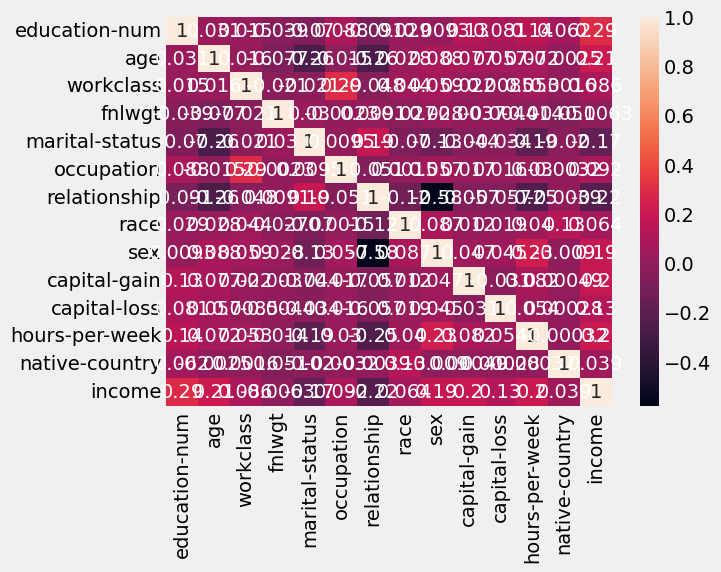

In [21]:
# Correlation matrix for continuous variables
correlation_matrix = df_causal.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

**Propensity Score Estimation:**

A logistic regression model was used to estimate the propensity scores, which represent the probability of each unit (individual in the dataset) receiving the treatment, given their covariates (other observed characteristics).

In [23]:
from sklearn.linear_model import LogisticRegression

# Let's assume 'treatment' is a binary variable indicating whether an individual received the treatment or not
# For the sake of example, let's consider 'education_num' as a proxy for the level of education received, thus our treatment
df['treatment'] = (df['education-num'] >= 10).astype(int)

In [24]:
# The outcome variable is whether the individual's income is more than 50K
df['outcome'] = (df['income'] == '>50K').astype(int)

In [25]:
logistic = LogisticRegression()
X_conf = df[confounders]
y_treat = df['treatment']

In [33]:
X_conf_encoded = pd.get_dummies(X_conf, drop_first=True)

# Fit the logistic regression model on the encoded confounders to predict treatment
logistic.fit(X_conf_encoded, y_treat)

# Compute propensity scores
df['propensity_score'] = logistic.predict_proba(X_conf_encoded)[:, 1]

In [34]:
df['propensity_score']

0        0.562088
1        0.455206
2        0.529423
3        0.506065
4        0.531896
           ...   
48837    0.518099
48838    0.482081
48839    0.540333
48840    0.584255
48841    0.588779
Name: propensity_score, Length: 48842, dtype: float64

**Importance of Propensity Score Estimation:**
  * **Balance:** Propensity scores help create a balance between treatment and control groups on observed covariates. This simulates a randomized experimental design and allows for a more accurate estimation of the causal effect.

  * **Reduction of Bias:** By matching treated and control units with similar propensity scores, you reduce selection bias caused by observed confounding variables.

  * **Efficiency:** It can be more efficient than stratification on multiple covariates, especially when there are many confounders, as it condenses multiple covariates into a single score.

**Matching Treatment and Control Groups:**

Using the estimated propensity scores, individuals in the treatment group were matched with similar individuals in the control group. This matching was based on the similarity of their propensity scores, aiming to create equivalent groups for comparison. This step is crucial in balancing the dataset and reducing selection bias caused by observed confounders.

In [35]:
from sklearn.neighbors import NearestNeighbors

In [36]:
# Separate the treatment and control groups
treatment_df = df[df['treatment'] == 1]
control_df = df[df['treatment'] == 0]

In [37]:
# Initialize NearestNeighbors model
nn = NearestNeighbors(n_neighbors=1, metric='euclidean')

In [38]:
# Fit the model to the control group
nn.fit(control_df[['propensity_score']])

NearestNeighbors(metric='euclidean', n_neighbors=1)

In [39]:
# Find the nearest neighbor in the control group for each treated instance
distances, indices = nn.kneighbors(treatment_df[['propensity_score']])

In [40]:
# Retrieve the control instances that are the closest matches to the treated instances
matched_control_df = control_df.iloc[indices.flatten()]

In [41]:
# Combine the matched instances into a single DataFrame
matched_df = treatment_df.append(matched_control_df).sort_index()

In [42]:
matched_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,treatment,outcome,propensity_score
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,1,0,0.562088
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,1,0,0.455206
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,0,0.506065
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,0,0.506065
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,1,0,0.531896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.,0,0,0.482081
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.,0,0,0.482081
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.,1,0,0.540333
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.,1,0,0.584255


**Causal Effect Estimation:**

After matching, the causal effect of the treatment on the outcome variable was estimated. This involved comparing the outcome variable (e.g., income) between the matched treatment and control groups. A t-test was used to assess whether any observed differences in the outcome were statistically significant.


**Interpreting Results:**

The results, particularly the T-statistic and P-value from the t-test, were interpreted to understand the statistical significance of the treatment effect. A significant result suggested that the treatment had a measurable impact on the outcome.

In [50]:
# Import necessary library for matching
from sklearn.neighbors import NearestNeighbors

# Assuming 'propensity_score' has been added to the df
# Create a NearestNeighbors model to find nearest propensity scores
nn = NearestNeighbors(n_neighbors=1, algorithm='ball_tree')

# Fit the model using control group propensity scores
control_group = df[df['treatment'] == 0]
nn.fit(control_group[['propensity_score']])

# Find matches for the treatment group
treatment_group = df[df['treatment'] == 1]
distances, indices = nn.kneighbors(treatment_group[['propensity_score']])

# Retrieve the matched controls
matched_controls = control_group.iloc[indices.flatten()]

# Concatenate the matched treatment and control instances
matched_df = pd.concat([treatment_group.reset_index(drop=True),
                        matched_controls.reset_index(drop=True)],
                        axis=0)

In [48]:
# Converting 'income' to a numerical format if it's not already
# Assuming 'income' is a binary categorical variable like '<=50K', '>50K'
df['income_numerical'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

In [49]:

# Now, extract the income data for treated and control groups after matching
treated_outcome = matched_df[matched_df['treatment'] == 1]['income_numerical']
control_outcome = matched_df[matched_df['treatment'] == 0]['income_numerical']

# Calculate the t-statistic and the p-value
from scipy.stats import ttest_ind
t_stat, p_val = ttest_ind(treated_outcome, control_outcome)

# Interpret the results
print(f'T-statistic: {t_stat}, P-value: {p_val}')

T-statistic: 37.857879305114324, P-value: 1.661887861945115e-309


**T-statistic**
The T-statistic is a ratio calculated from the difference between the two group means divided by the standard error of the difference between the means.
A higher absolute value of the T-statistic indicates a greater difference between the groups.
a T-statistic of 37.86 is quite high, suggesting a significant difference between the two groups.

**P-value**
The P-value tells you about the likelihood or probability of observing your data (or something more extreme) assuming that the null hypothesis is true. The null hypothesis typically states that there is no effect or no difference between groups.
A very small P-value (close to 0) indicates that it is highly unlikely to observe such data by chance alone if the null hypothesis were true.
In practical terms, a P-value below a certain threshold (commonly 0.05) allows you to reject the null hypothesis. In your case, the P-value is extremely small (essentially 0), far below the typical threshold, indicating that the difference in means you're observing is statistically significant.

**Interpretation:**

Based on your T-statistic and P-value, you can conclude that there is a statistically significant difference between the two groups you are comparing. This significant difference lends credibility to the idea that the treatment you are studying has a real, measurable impact on the outcome variable.

However, while these statistics tell you that the difference is statistically significant, they do not measure the size of the effect or its practical significance. For that, you would look at the actual difference in means or other effect size metrics. Additionally, remember that statistical significance does not imply causation, especially if potential confounders were not adequately controlled for.

**References:**

* Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

* Pearl, J. (2009). "Causality: Models, Reasoning, and Inference."
This book by Judea Pearl is a foundational text in the field of causal inference, introducing the theory of causal models and the use of graphical models in understanding causality.

* Morgan, S. L., & Winship, C. (2015). "Counterfactuals and Causal Inference: Methods and Principles for Social Research."
This book offers a comprehensive overview of counterfactual reasoning, which is central to understanding causal effects.

* Hernán, M. A., & Robins, J. M. (2020). "Causal Inference: What If."
A more recent text that provides an introduction to causal inference with a strong focus on practical applications, particularly in public health and epidemiology.

* Imbens, G. W., & Rubin, D. B. (2015). "Causal Inference for Statistics, Social, and Biomedical Sciences: An Introduction."
This book bridges the gap between the statistical theory and practice of causal inference, particularly useful for those working with observational data.

* Peters, J., Janzing, D., & Schölkopf, B. (2017). "Elements of Causal Inference: Foundations and Learning Algorithms."
This resource provides an in-depth look at the foundational elements of causal inference with a focus on machine learning algorithms.

* Online Resources and Tutorials:
Websites like Towards Data Science, Kaggle, and academic course websites often have articles and tutorials on causal inference, including practical code examples and discussions of real-world applications.